# 01_eda.ipynb

## 1. Setup

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2. Download data


In [3]:
ticker = yf.Ticker("^GSPC")
df = ticker.history(period="max")
df.drop(columns=["Dividends", "Stock Splits"], inplace=True)
df.to_csv("../data/raw/sp500_raw.csv")

## 3. Basic inspection


In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24423 entries, 1927-12-30 00:00:00-05:00 to 2025-03-25 00:00:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    24423 non-null  float64
 1   High    24423 non-null  float64
 2   Low     24423 non-null  float64
 3   Close   24423 non-null  float64
 4   Volume  24423 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.1 MB


,Open,High,Low,Close,Volume
count,24423.000000,24423.000000,24423.000000,24423.000000,2.442300e+04
mean,650.632738,674.190295,666.178825,670.438319,9.283548e+08
std,1123.590970,1118.781278,1106.380487,1112.970306,1.637308e+09
min,0.000000,4.400000,4.400000,4.400000,0.000000e+00
25%,9.765000,24.780001,24.780001,24.780001,1.560000e+06
50%,43.750000,103.629997,101.940002,102.790001,2.097000e+07
75%,1060.600037,1069.479980,1052.210022,1060.440002,1.062350e+09
max,6134.500000,6147.430176,6111.149902,6144.149902,1.145623e+10


## 4. Plot closing price


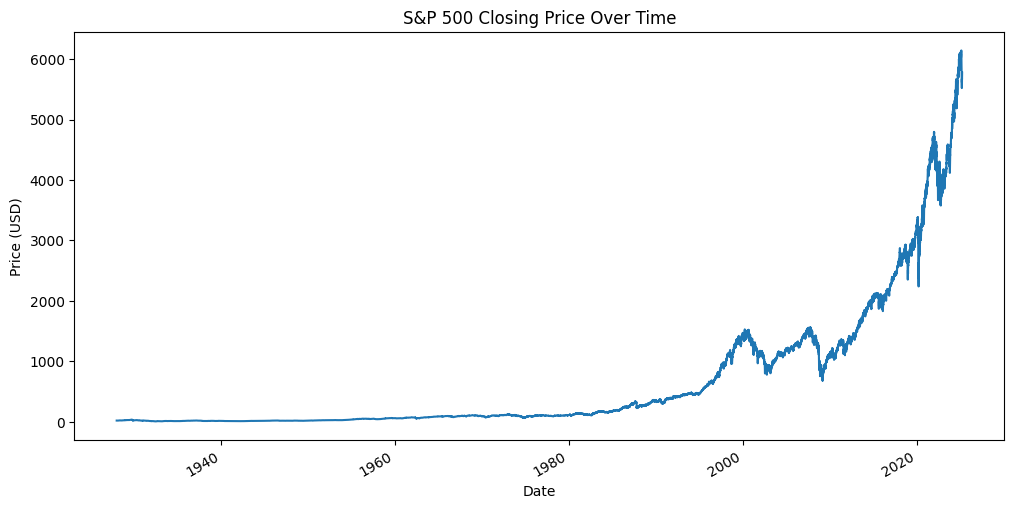

In [5]:
plt.figure(figsize=(12,6))
df['Close'].plot(title="S&P 500 Closing Price Over Time")
plt.ylabel("Price (USD)")
plt.savefig("../reports/images/eda/closing_price.png")
plt.show()

## 5. Plot volume


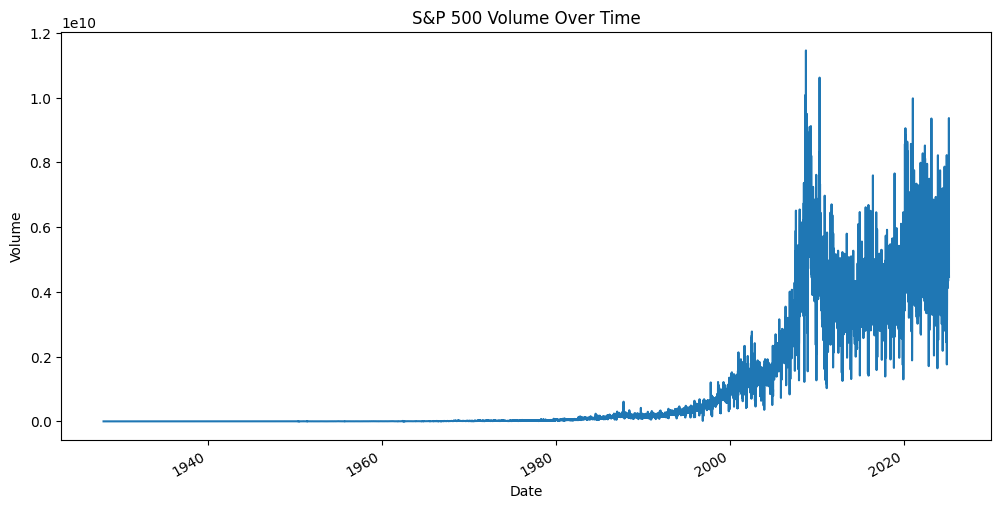

In [6]:
plt.figure(figsize=(12,6))
df['Volume'].plot(title="S&P 500 Volume Over Time")
plt.ylabel("Volume")
plt.savefig("../reports/images/eda/volume.png")
plt.show()

## 6. Compute daily return


In [7]:
df['Return'] = df['Close'].pct_change()
df['Up'] = (df['Return'] > 0).astype(int)

## 7. Market direction counts


In [8]:
direction_counts = df['Up'].value_counts(normalize=True)
print("Percent up days:", direction_counts[1]*100)
print("Percent down days:", direction_counts[0]*100)

Percent up days: 52.39733038529255
Percent down days: 47.60266961470745


## 8. Correlation heatmap


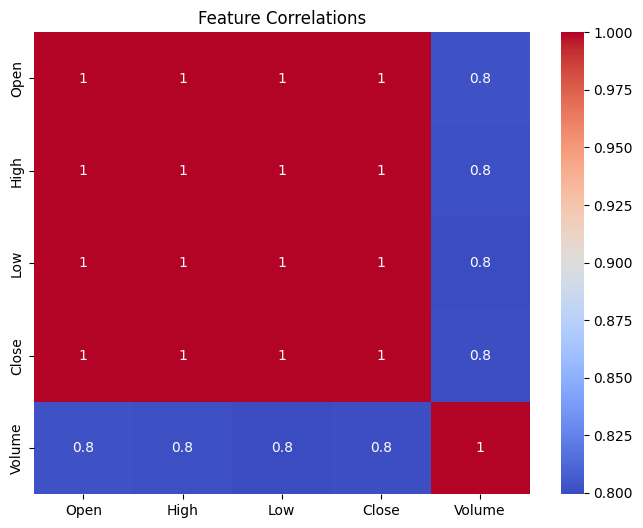

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.savefig("../reports/images/eda/correlation_heatmap.png")
plt.show()

## 9. Export summary (optional)


In [11]:
with open("../reports/eda_summary_before_clean_data.md", "w") as f:
    f.write(f"""
# EDA Summary

- Total trading days: {len(df)}
- Percent of up days: {direction_counts[1]*100:.2f}%
- Percent of down days: {direction_counts[0]*100:.2f}%

See plots in `reports/images/eda/`
""")